In [1]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('C:/Users/miant/Desktop/Python/Movies.csv')
dataset.head()

,Production Budget(M),Worldwide Gross Income (M),Genre
0,13,230,action
1,16,224,drama
2,15,221,thriller_suspense
3,14,202,adventure
4,16,198,adventure


In [3]:
#We identify the categorical and the numerical data

categorical = 'Genre'
numerical = ['Production Budget(M)', 'Worldwide Gross Income (M)']

In [4]:
#We select our X

X = dataset[[categorical] + numerical]

In [6]:
#Encoding the categorical data

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
X_encoded = np.array(ct.fit_transform(X))

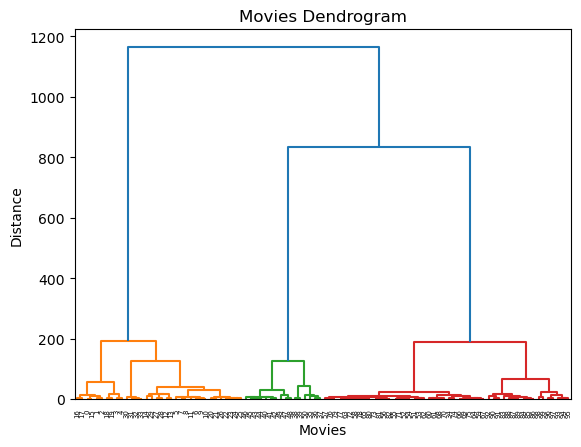

In [7]:
#We will conduct the dendrogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_encoded, method = 'ward'))
plt.title('Movies Dendrogram')
plt.xlabel('Movies')
plt.ylabel('Distance')
plt.show()

In [9]:
#We need to train the model with the data
from sklearn.cluster import AgglomerativeClustering
h_clus = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
y = h_clus.fit_predict(X_encoded)

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [11]:
#Append the y into the dataset
dataset['Movie_Type'] = y

In [12]:
dataset

,Production Budget(M),Worldwide Gross Income (M),Genre,Movie_Type
0,13,230,action,0
1,16,224,drama,0
2,15,221,thriller_suspense,0
3,14,202,adventure,0
4,16,198,adventure,0
...,...,...,...,...
95,37,16,adventure,1
96,32,19,action,1
97,31,17,action,1
98,26,16,western,1


In [17]:
movies = dataset[dataset["Movie_Type"]==0]

In [18]:
movies

,Production Budget(M),Worldwide Gross Income (M),Genre,Movie_Type
0,13,230,action,0
1,16,224,drama,0
2,15,221,thriller_suspense,0
3,14,202,adventure,0
4,16,198,adventure,0
5,14,180,action,0
6,18,178,action,0
7,14,176,adventure,0
8,13,176,adventure,0
9,17,175,adventure,0


In [20]:
movies1 = dataset[dataset["Movie_Type"]==1]
movies1

,Production Budget(M),Worldwide Gross Income (M),Genre,Movie_Type
34,13,12,action,1
51,8,4,adventure,1
52,9,10,adventure,1
53,8,7,adventure,1
54,9,9,adventure,1
55,9,10,action,1
56,3,9,action,1
57,5,6,adventure,1
58,7,9,action,1
59,7,15,adventure,1


In [22]:
movies2 = dataset[dataset["Movie_Type"]==2]
movies2

,Production Budget(M),Worldwide Gross Income (M),Genre,Movie_Type
35,230,16,action,2
36,224,15,adventure,2
37,221,14,adventure,2
38,202,16,adventure,2
39,198,14,action,2
40,180,18,action,2
41,178,14,adventure,2
42,176,13,adventure,2
43,176,17,adventure,2
44,175,18,action,2
